Курсовая работа - анализ взаимозависимостей длины границ государств и их площади

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

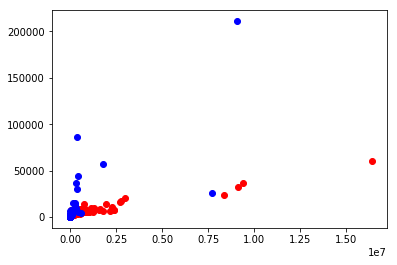

In [3]:
# данные взяты отсюда: 
# https://ru.countries.world/world/%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C_%D1%82%D0%B5%D1%80%D1%80%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%B8-33_0_2015_a.html
# а после переработаны в три текстовых файла: cntry_sqr.txt, cntry_marg.txt, cntry_quot.txt 
# - площадь территории, длина границ и доля сухопутных границ
# вычисляю коэфф.корреляции длины границ от площади сначала для всех стран, а потом отдельно по двум подгруппам:
# преимущественно сухопутные страны (q>0.2) и преимущественно морские (q<=0.2)
# Нулевая гипотеза - корреляция не зависит от типа подгрупп - все страны имеют единый r_xy
# Получив к.кор для трех случаев, проверяю гипотезу, что отклонения в подгруппах - следствие случайного разброса

frs = open("cntry_sqr.txt","r")
lst_sqr =[]
for line in frs:
    lst = line.split()
    lst_sqr.append([lst[0],float(lst[1])])
 
#print(len(lst_sqr))
sqr_ser = pd.Series(dict(lst_sqr))
#print(sqr_ser)

frm = open("cntry_marg.txt","r")
lst_mrg =[]
for line in frm:
    lst = line.split()
    lst_mrg.append([lst[0],float(lst[1])])

mrg_ser = pd.Series(dict(lst_mrg))

frq = open("cntry_quot.txt","r")
lst_quo =[]
for line in frq:
    lst = line.split()
    lst_quo.append([lst[0],float(lst[1])])

quo_ser = pd.Series(dict(lst_quo))


states = pd.DataFrame({'area':sqr_ser, 'margn':mrg_ser,'quota':quo_ser})
quo = 0.2
sta_1 = states[states.quota>quo]
sta_2 = states[states.quota<=quo]

plt.scatter(sta_1.area,sta_1.margn,c='red')  # сухопутные страны
plt.scatter(sta_2.area,sta_2.margn,c='blue') # морские страны

In [4]:
print(len(states),len(sta_1),len(sta_2))
corr_0 = np.corrcoef(states.area,states.margn)
corr_1 = np.corrcoef(sta_1.area,sta_1.margn)
corr_2 = np.corrcoef(sta_2.area,sta_2.margn)
print(corr_0,'\n',corr_1,'\n',corr_2)

231 149 82
[[1.         0.59657302]
 [0.59657302 1.        ]] 
 [[1.         0.94836463]
 [0.94836463 1.        ]] 
 [[1.         0.76193205]
 [0.76193205 1.        ]]


In [8]:
# итак, на полном множестве N=231 r_xy=0.59 (а на подмножествах: N=149 r_xy=0.94, N=82 r_xy=0.76).
# пусть мат.ожидание коэфф.корреляции равно r=0.59, 
# какова вероятность получения значений r=0.94? на выборке N=149, и r=0.76, N=82?
# Для чего от к.к перейдем к функциям w =  0.5*log((1.0+r)/(1.0-r)) и D=1/(N-3)
# 
N,r= 231,0.59
mu_0 = 0.5*np.log((1.0+r)/(1.0-r))
sg_0 = 1.0/np.sqrt(N-3)

N,r= 149,0.94
mu_1 = 0.5*np.log((1.0+r)/(1.0-r))

print(mu_0,sg_0)

0.6776660677579618 0.06622661785325219


In [10]:
# стандартная нормальная величина имеет
z = (mu_0 - mu_1)*np.sqrt(N)/sg_0
print(z)
# что свидетельствует о необходимости отказаться от 0-гипотезы

-195.44448842796987
